# PyTorch
* Like numpy but allows us to use GPU for calculations

In [1]:
import torch
import torchvision
import torchvision.datasets as dset
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from torch.autograd import Variable

## Data Loading

* Torchvision is an accompanying library to pyTorch. It contains some data set loaders, and a Dataset class you may extend if you wish.
* torch.utils.data works with the DataSet class to provide data loaders. It's a complex class so if you use it, just use it as is.
* Alternatively you can write your own loader code.

## Train/Test Data
* You will want to train on some of the data, and test with the rest. We will provide you with the split.

## Tensors
* The default loader class will create instances of PyTorch Tensors. They're like Numpy arrays, but can also reside on your GPU.

In [2]:
# Automatic transforms. Normalize(0.5, 0.5) will set that mean and std-dev
# Based on statistics of the data
trans = transforms.Compose([transforms.ToTensor()])
train_set = dset.MNIST(root='./mnist_data', train=True, transform=trans, download=True)
test_set = dset.MNIST(root='./mnist_data', train=False, transform=trans)
N = 8
train_loader = DataLoader(dataset=train_set, batch_size=N, shuffle=True, num_workers=2)
test_loader = DataLoader(dataset=test_set, batch_size=N, shuffle=False, num_workers=2)

## Looking at the data
* Notice the transpose! Though these are black/white images, you'll need to swap channels around to get normal colors.
* If you normalize your data, you may have to recenter it before displaying.

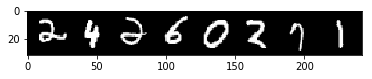

2 4 2 6 0 2 7 1


Process Process-2:
Traceback (most recent call last):
Process Process-1:
Traceback (most recent call last):
  File "/Users/jawa/anaconda2/envs/dl_cv_2/lib/python2.7/multiprocessing/process.py", line 267, in _bootstrap
  File "/Users/jawa/anaconda2/envs/dl_cv_2/lib/python2.7/multiprocessing/process.py", line 267, in _bootstrap
    self.run()
  File "/Users/jawa/anaconda2/envs/dl_cv_2/lib/python2.7/multiprocessing/process.py", line 114, in run
    self.run()
    self._target(*self._args, **self._kwargs)
  File "/Users/jawa/anaconda2/envs/dl_cv_2/lib/python2.7/multiprocessing/process.py", line 114, in run
  File "/Users/jawa/anaconda2/envs/dl_cv_2/lib/python2.7/site-packages/torch/utils/data/dataloader.py", line 34, in _worker_loop
    self._target(*self._args, **self._kwargs)
    r = index_queue.get()
  File "/Users/jawa/anaconda2/envs/dl_cv_2/lib/python2.7/site-packages/torch/utils/data/dataloader.py", line 34, in _worker_loop
  File "/Users/jawa/anaconda2/envs/dl_cv_2/lib/python2.7/mul

In [4]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()
dataiter = iter(train_loader)
images, labels = dataiter.next()
grid = torchvision.utils.make_grid(images)
imshow(grid)
print " ".join(["%s" % i for i in labels])

In [5]:
print (images[0].shape)
D_in = 28 * 28 # size of input
H = 400     # size of hidden layer
D_out = 10    # number of classes

torch.Size([1, 28, 28])


In [7]:
# Randomly initialize weights
w1 = torch.randn(D_in, H)
w2 = torch.randn(H, D_out)

learning_rate = 1e-6 # learning rate
epochs = 3

for epoch in range(epochs):
    for imgs, labels in train_loader:
        ## Forward pass ##     
        # flatten image
        imgs.resize_((N, D_in)) 
        # multiply by hidden layer weights
        h = imgs.mm(w1)
        # non-linearity (RELU)
        h_relu = h.clamp(min=0)
        # multiply hidden layer by second set of weights
        y_pred = h_relu.mm(w2)
        
        ## Calculate Loss ##
        # Get categorical representation of label
        y = torch.eye(10)[labels]

        # SSD
        #loss = (y_pred - y).pow(2).sum()
        y_diff = y_pred - y
        y_pow = y_diff.pow(2)
        loss = y_pow.sum()
        print "Epoch = %d, Loss = %f" % (epoch, loss)
            
        ## Back propagation ##
        # Back propagate loss
        d_y_pow = loss
        d_y_diff = 2.0 * 1.0 * y_diff
        d_y_pred = d_y_diff
        # Multiplication: del x (x*y) = y, del y (x * y) = x
        d_w2 = h_relu.t().mm(d_y_pred)
        d_h_relu = d_y_pred.mm(w2.t())
        d_h = d_h_relu.clone()
        d_h[h < 0] = 0
        d_w1 = imgs.t().mm(d_h)

        # Update weights using gradient descent
        w1 -= learning_rate * d_w1
        w2 -= learning_rate * d_w2

Epoch = 0, Loss = 1320212.377311
Epoch = 0, Loss = 634789.950420
Epoch = 0, Loss = 737417.230477
Epoch = 0, Loss = 789839.595287
Epoch = 0, Loss = 750242.968395
Epoch = 0, Loss = 578836.905971
Epoch = 0, Loss = 473626.821975
Epoch = 0, Loss = 357348.169372
Epoch = 0, Loss = 650154.878007
Epoch = 0, Loss = 450175.336482
Epoch = 0, Loss = 366032.788031
Epoch = 0, Loss = 531389.776990
Epoch = 0, Loss = 438432.141995
Epoch = 0, Loss = 507887.535549
Epoch = 0, Loss = 622142.200900
Epoch = 0, Loss = 641633.118049
Epoch = 0, Loss = 477706.297117
Epoch = 0, Loss = 465646.366765
Epoch = 0, Loss = 427984.578116
Epoch = 0, Loss = 442728.851292
Epoch = 0, Loss = 470482.422198
Epoch = 0, Loss = 413636.176111
Epoch = 0, Loss = 428510.183835
Epoch = 0, Loss = 297448.186185
Epoch = 0, Loss = 327884.649238
Epoch = 0, Loss = 462357.664535
Epoch = 0, Loss = 559443.189460
Epoch = 0, Loss = 458248.703523
Epoch = 0, Loss = 359598.688284
Epoch = 0, Loss = 293972.893237
Epoch = 0, Loss = 367569.914010
Epoch =

Epoch = 0, Loss = 140209.233661
Epoch = 0, Loss = 165115.708531
Epoch = 0, Loss = 106826.575766
Epoch = 0, Loss = 94263.130798
Epoch = 0, Loss = 228040.058985
Epoch = 0, Loss = 184879.771552
Epoch = 0, Loss = 156217.116709
Epoch = 0, Loss = 209086.965625
Epoch = 0, Loss = 154456.360896
Epoch = 0, Loss = 139271.350956
Epoch = 0, Loss = 163035.177527
Epoch = 0, Loss = 161736.609093
Epoch = 0, Loss = 128770.588885
Epoch = 0, Loss = 120947.348313
Epoch = 0, Loss = 139554.852119
Epoch = 0, Loss = 195068.300072
Epoch = 0, Loss = 179298.986413
Epoch = 0, Loss = 151976.903288
Epoch = 0, Loss = 120207.476708
Epoch = 0, Loss = 183512.567754
Epoch = 0, Loss = 118813.168512
Epoch = 0, Loss = 180189.930547
Epoch = 0, Loss = 165233.652443
Epoch = 0, Loss = 125506.028592
Epoch = 0, Loss = 148926.738066
Epoch = 0, Loss = 146868.282694
Epoch = 0, Loss = 166105.064536
Epoch = 0, Loss = 145134.357854
Epoch = 0, Loss = 175807.992430
Epoch = 0, Loss = 236536.459485
Epoch = 0, Loss = 165438.880637
Epoch = 0

Epoch = 0, Loss = 144454.283408
Epoch = 0, Loss = 120155.045228
Epoch = 0, Loss = 128586.293199
Epoch = 0, Loss = 146505.831909
Epoch = 0, Loss = 103708.709640
Epoch = 0, Loss = 95485.920901
Epoch = 0, Loss = 70264.814318
Epoch = 0, Loss = 99148.338190
Epoch = 0, Loss = 104308.879867
Epoch = 0, Loss = 144346.911137
Epoch = 0, Loss = 134376.519668
Epoch = 0, Loss = 96943.510760
Epoch = 0, Loss = 104008.445141
Epoch = 0, Loss = 95096.203706
Epoch = 0, Loss = 130356.021308
Epoch = 0, Loss = 106582.721209
Epoch = 0, Loss = 84045.287384
Epoch = 0, Loss = 126254.064115
Epoch = 0, Loss = 113353.425697
Epoch = 0, Loss = 87828.951771
Epoch = 0, Loss = 123108.317243
Epoch = 0, Loss = 77137.797208
Epoch = 0, Loss = 100434.459854
Epoch = 0, Loss = 119338.835242
Epoch = 0, Loss = 93761.622887
Epoch = 0, Loss = 120849.031470
Epoch = 0, Loss = 107187.524657
Epoch = 0, Loss = 95877.504832
Epoch = 0, Loss = 128656.921718
Epoch = 0, Loss = 114379.181368
Epoch = 0, Loss = 86600.052285
Epoch = 0, Loss = 1

Epoch = 0, Loss = 89500.982913
Epoch = 0, Loss = 76976.615654
Epoch = 0, Loss = 101386.563755
Epoch = 0, Loss = 99739.940304
Epoch = 0, Loss = 79432.111333
Epoch = 0, Loss = 84403.464030
Epoch = 0, Loss = 98867.850227
Epoch = 0, Loss = 69850.122199
Epoch = 0, Loss = 65095.667517
Epoch = 0, Loss = 102265.093950
Epoch = 0, Loss = 130886.724893
Epoch = 0, Loss = 92129.879260
Epoch = 0, Loss = 100630.136523
Epoch = 0, Loss = 112162.555877
Epoch = 0, Loss = 96743.286754
Epoch = 0, Loss = 92988.607247
Epoch = 0, Loss = 104744.239930
Epoch = 0, Loss = 58701.271799
Epoch = 0, Loss = 71530.058753
Epoch = 0, Loss = 113387.953347
Epoch = 0, Loss = 85195.014887
Epoch = 0, Loss = 96142.044474
Epoch = 0, Loss = 122184.367006
Epoch = 0, Loss = 89984.111715
Epoch = 0, Loss = 110864.941421
Epoch = 0, Loss = 81000.659126
Epoch = 0, Loss = 92667.208698
Epoch = 0, Loss = 83855.193056
Epoch = 0, Loss = 80907.262544
Epoch = 0, Loss = 81884.009871
Epoch = 0, Loss = 86252.670467
Epoch = 0, Loss = 98771.631146

Epoch = 0, Loss = 77227.818764
Epoch = 0, Loss = 77048.349015
Epoch = 0, Loss = 87517.230301
Epoch = 0, Loss = 61235.441913
Epoch = 0, Loss = 75107.067138
Epoch = 0, Loss = 63727.378328
Epoch = 0, Loss = 100100.285763
Epoch = 0, Loss = 77479.702920
Epoch = 0, Loss = 63791.408689
Epoch = 0, Loss = 91048.428287
Epoch = 0, Loss = 116733.586355
Epoch = 0, Loss = 81423.971242
Epoch = 0, Loss = 123538.918023
Epoch = 0, Loss = 65922.577751
Epoch = 0, Loss = 94813.640919
Epoch = 0, Loss = 51965.211396
Epoch = 0, Loss = 71389.233542
Epoch = 0, Loss = 78128.824330
Epoch = 0, Loss = 71963.491425
Epoch = 0, Loss = 52931.701065
Epoch = 0, Loss = 87130.000777
Epoch = 0, Loss = 70919.731392
Epoch = 0, Loss = 80648.519446
Epoch = 0, Loss = 78539.077159
Epoch = 0, Loss = 67736.216990
Epoch = 0, Loss = 67875.551317
Epoch = 0, Loss = 63506.625151
Epoch = 0, Loss = 70742.446160
Epoch = 0, Loss = 76041.012650
Epoch = 0, Loss = 90161.196719
Epoch = 0, Loss = 59725.612079
Epoch = 0, Loss = 99061.154235
Epoch

Epoch = 0, Loss = 73720.934680
Epoch = 0, Loss = 83725.618633
Epoch = 0, Loss = 47753.594579
Epoch = 0, Loss = 74440.597591
Epoch = 0, Loss = 76059.154494
Epoch = 0, Loss = 92389.591024
Epoch = 0, Loss = 51980.085707
Epoch = 0, Loss = 65137.820179
Epoch = 0, Loss = 102341.304420
Epoch = 0, Loss = 70405.266590
Epoch = 0, Loss = 68424.891231
Epoch = 0, Loss = 51502.314443
Epoch = 0, Loss = 79366.820594
Epoch = 0, Loss = 59027.455917
Epoch = 0, Loss = 76576.528625
Epoch = 0, Loss = 66259.871812
Epoch = 0, Loss = 78780.160629
Epoch = 0, Loss = 56527.128873
Epoch = 0, Loss = 66506.892546
Epoch = 0, Loss = 69861.981187
Epoch = 0, Loss = 57657.420153
Epoch = 0, Loss = 76284.157498
Epoch = 0, Loss = 94591.187070
Epoch = 0, Loss = 83521.682021
Epoch = 0, Loss = 98736.773318
Epoch = 0, Loss = 59903.516905
Epoch = 0, Loss = 80049.073039
Epoch = 0, Loss = 52096.487187
Epoch = 0, Loss = 79556.341661
Epoch = 0, Loss = 48051.507059
Epoch = 0, Loss = 57064.826146
Epoch = 0, Loss = 63345.553902
Epoch =

Epoch = 0, Loss = 70100.201623
Epoch = 0, Loss = 46060.625165
Epoch = 0, Loss = 71569.965493
Epoch = 0, Loss = 48507.632922
Epoch = 0, Loss = 58577.209630
Epoch = 0, Loss = 41372.532927
Epoch = 0, Loss = 70100.741344
Epoch = 0, Loss = 69697.557325
Epoch = 0, Loss = 43472.744272
Epoch = 0, Loss = 80277.983755
Epoch = 0, Loss = 46991.720751
Epoch = 0, Loss = 48874.532549
Epoch = 0, Loss = 55355.350387
Epoch = 0, Loss = 78627.630899
Epoch = 0, Loss = 84878.547032
Epoch = 0, Loss = 55583.613890
Epoch = 0, Loss = 53716.024037
Epoch = 0, Loss = 90084.262436
Epoch = 0, Loss = 50233.807335
Epoch = 0, Loss = 70889.413302
Epoch = 0, Loss = 58262.228323
Epoch = 0, Loss = 71425.642954
Epoch = 0, Loss = 64708.504034
Epoch = 0, Loss = 58128.639227
Epoch = 0, Loss = 53722.653158
Epoch = 0, Loss = 92166.126173
Epoch = 0, Loss = 63477.959493
Epoch = 0, Loss = 79057.160738
Epoch = 0, Loss = 59499.782614
Epoch = 0, Loss = 45209.844749
Epoch = 0, Loss = 60168.477258
Epoch = 0, Loss = 62216.089280
Epoch = 

Epoch = 0, Loss = 69837.395317
Epoch = 0, Loss = 55328.492697
Epoch = 0, Loss = 74579.114148
Epoch = 0, Loss = 52950.941006
Epoch = 0, Loss = 54573.283273
Epoch = 0, Loss = 59440.116523
Epoch = 0, Loss = 55945.073295
Epoch = 0, Loss = 60636.428890
Epoch = 0, Loss = 49915.723196
Epoch = 0, Loss = 55851.795525
Epoch = 0, Loss = 64860.334514
Epoch = 0, Loss = 61862.042079
Epoch = 0, Loss = 90375.633052
Epoch = 0, Loss = 52701.280707
Epoch = 0, Loss = 75034.104682
Epoch = 0, Loss = 49565.424421
Epoch = 0, Loss = 60409.337885
Epoch = 0, Loss = 90441.357600
Epoch = 0, Loss = 60782.398901
Epoch = 0, Loss = 41419.405721
Epoch = 0, Loss = 66613.026850
Epoch = 0, Loss = 58201.256567
Epoch = 0, Loss = 82875.526362
Epoch = 0, Loss = 54137.370131
Epoch = 0, Loss = 37105.858763
Epoch = 0, Loss = 49080.097331
Epoch = 0, Loss = 58508.615968
Epoch = 0, Loss = 52994.195786
Epoch = 0, Loss = 69503.645797
Epoch = 0, Loss = 48466.863951
Epoch = 0, Loss = 65824.860022
Epoch = 0, Loss = 49602.348624
Epoch = 

Epoch = 0, Loss = 60093.045999
Epoch = 0, Loss = 67445.011433
Epoch = 0, Loss = 60195.248406
Epoch = 0, Loss = 41371.549707
Epoch = 0, Loss = 63344.160158
Epoch = 0, Loss = 58430.882065
Epoch = 0, Loss = 63538.241547
Epoch = 0, Loss = 57235.144989
Epoch = 0, Loss = 87846.120241
Epoch = 0, Loss = 53435.114138
Epoch = 0, Loss = 50006.118688
Epoch = 0, Loss = 84706.073947
Epoch = 0, Loss = 83586.212707
Epoch = 0, Loss = 63818.821315
Epoch = 0, Loss = 41090.478841
Epoch = 0, Loss = 68034.420293
Epoch = 0, Loss = 52031.055111
Epoch = 0, Loss = 56390.835707
Epoch = 0, Loss = 52314.458486
Epoch = 0, Loss = 49509.709348
Epoch = 0, Loss = 37048.485289
Epoch = 0, Loss = 58934.547782
Epoch = 0, Loss = 40432.946023
Epoch = 0, Loss = 42759.775849
Epoch = 0, Loss = 27363.583062
Epoch = 0, Loss = 37827.981761
Epoch = 0, Loss = 38367.900573
Epoch = 0, Loss = 58882.581024
Epoch = 0, Loss = 62771.069659
Epoch = 0, Loss = 79933.448830
Epoch = 0, Loss = 45761.167793
Epoch = 0, Loss = 67495.374197
Epoch = 

Epoch = 0, Loss = 42429.728576
Epoch = 0, Loss = 48657.795087
Epoch = 0, Loss = 55683.365253
Epoch = 0, Loss = 41981.329454
Epoch = 0, Loss = 51182.359214
Epoch = 0, Loss = 66855.266606
Epoch = 0, Loss = 48130.141159
Epoch = 0, Loss = 58936.545918
Epoch = 0, Loss = 59372.830053
Epoch = 0, Loss = 54782.515900
Epoch = 0, Loss = 52673.586086
Epoch = 0, Loss = 43456.244010
Epoch = 0, Loss = 44910.596498
Epoch = 0, Loss = 64482.475945
Epoch = 0, Loss = 64128.847428
Epoch = 0, Loss = 55228.409692
Epoch = 0, Loss = 45708.679118
Epoch = 0, Loss = 54956.005563
Epoch = 0, Loss = 33658.865440
Epoch = 0, Loss = 55745.991510
Epoch = 0, Loss = 58828.194613
Epoch = 0, Loss = 42236.580940
Epoch = 0, Loss = 51410.357921
Epoch = 0, Loss = 41312.537547
Epoch = 0, Loss = 54515.628036
Epoch = 0, Loss = 34485.667254
Epoch = 0, Loss = 45443.788553
Epoch = 0, Loss = 34772.237734
Epoch = 0, Loss = 47694.528705
Epoch = 0, Loss = 26555.931657
Epoch = 0, Loss = 51303.817139
Epoch = 0, Loss = 34560.793151
Epoch = 

Epoch = 0, Loss = 25848.611650
Epoch = 0, Loss = 34978.428591
Epoch = 0, Loss = 47929.139990
Epoch = 0, Loss = 55716.115100
Epoch = 0, Loss = 27376.857750
Epoch = 0, Loss = 47124.445423
Epoch = 0, Loss = 35847.389540
Epoch = 0, Loss = 27161.655426
Epoch = 0, Loss = 43200.449973
Epoch = 0, Loss = 60101.124766
Epoch = 0, Loss = 41129.341728
Epoch = 0, Loss = 51174.502762
Epoch = 0, Loss = 53199.040422
Epoch = 0, Loss = 36670.685250
Epoch = 0, Loss = 41281.327258
Epoch = 0, Loss = 37739.285917
Epoch = 0, Loss = 53605.568060
Epoch = 0, Loss = 52047.557093
Epoch = 0, Loss = 50255.386267
Epoch = 0, Loss = 45452.647440
Epoch = 0, Loss = 55355.632091
Epoch = 0, Loss = 31212.032267
Epoch = 0, Loss = 68349.019393
Epoch = 0, Loss = 47846.754931
Epoch = 0, Loss = 49062.118154
Epoch = 0, Loss = 47514.538753
Epoch = 0, Loss = 56041.268040
Epoch = 0, Loss = 62447.842035
Epoch = 0, Loss = 36967.786789
Epoch = 0, Loss = 56275.433201
Epoch = 0, Loss = 40867.693257
Epoch = 0, Loss = 42227.200299
Epoch = 

Epoch = 0, Loss = 39323.537529
Epoch = 0, Loss = 34265.542440
Epoch = 0, Loss = 37765.154143
Epoch = 0, Loss = 37174.603594
Epoch = 0, Loss = 48527.778598
Epoch = 0, Loss = 54663.272369
Epoch = 0, Loss = 46148.776327
Epoch = 0, Loss = 36063.021565
Epoch = 0, Loss = 34610.110229
Epoch = 0, Loss = 34952.673236
Epoch = 0, Loss = 45290.989801
Epoch = 0, Loss = 42637.501814
Epoch = 0, Loss = 39345.644541
Epoch = 0, Loss = 46317.359572
Epoch = 0, Loss = 45374.043352
Epoch = 0, Loss = 60173.813244
Epoch = 0, Loss = 48835.153404
Epoch = 0, Loss = 41203.781448
Epoch = 0, Loss = 49194.598973
Epoch = 0, Loss = 38228.379855
Epoch = 0, Loss = 34291.458227
Epoch = 0, Loss = 33029.644529
Epoch = 0, Loss = 41513.521572
Epoch = 0, Loss = 53701.233239
Epoch = 0, Loss = 40551.972356
Epoch = 0, Loss = 41184.846098
Epoch = 0, Loss = 33900.131844
Epoch = 0, Loss = 50810.046874
Epoch = 0, Loss = 50462.089769
Epoch = 0, Loss = 43347.416359
Epoch = 0, Loss = 38334.963528
Epoch = 0, Loss = 56176.294834
Epoch = 

Epoch = 0, Loss = 45280.830396
Epoch = 0, Loss = 36437.057536
Epoch = 0, Loss = 41668.328747
Epoch = 0, Loss = 43125.968348
Epoch = 0, Loss = 44331.674475
Epoch = 0, Loss = 35016.571347
Epoch = 0, Loss = 47959.402106
Epoch = 0, Loss = 25556.660979
Epoch = 0, Loss = 35709.961934
Epoch = 0, Loss = 46646.779924
Epoch = 0, Loss = 43295.185498
Epoch = 0, Loss = 32731.485958
Epoch = 0, Loss = 40793.436875
Epoch = 0, Loss = 60371.978497
Epoch = 0, Loss = 24827.302003
Epoch = 0, Loss = 40418.895257
Epoch = 0, Loss = 49578.972008
Epoch = 0, Loss = 42914.473149
Epoch = 0, Loss = 42970.931817
Epoch = 0, Loss = 34743.830460
Epoch = 0, Loss = 30582.768005
Epoch = 0, Loss = 29850.792993
Epoch = 0, Loss = 32905.564270
Epoch = 0, Loss = 38015.936610
Epoch = 0, Loss = 38311.825758
Epoch = 0, Loss = 40178.226890
Epoch = 0, Loss = 32726.743415
Epoch = 0, Loss = 47327.247903
Epoch = 0, Loss = 41579.397570
Epoch = 0, Loss = 41485.405187
Epoch = 0, Loss = 48186.631205
Epoch = 0, Loss = 29797.519129
Epoch = 

Epoch = 0, Loss = 46212.556501
Epoch = 0, Loss = 43342.343493
Epoch = 0, Loss = 59852.862434
Epoch = 0, Loss = 22286.760557
Epoch = 0, Loss = 46089.728529
Epoch = 0, Loss = 29757.147606
Epoch = 0, Loss = 51397.192924
Epoch = 0, Loss = 24313.321467
Epoch = 0, Loss = 26387.478229
Epoch = 0, Loss = 30173.186064
Epoch = 0, Loss = 26475.909203
Epoch = 0, Loss = 47336.287023
Epoch = 0, Loss = 29064.684165
Epoch = 0, Loss = 29757.390015
Epoch = 0, Loss = 38214.750556
Epoch = 0, Loss = 40286.325138
Epoch = 0, Loss = 53191.088219
Epoch = 0, Loss = 42153.119959
Epoch = 0, Loss = 29579.437772
Epoch = 0, Loss = 32588.830352
Epoch = 0, Loss = 45621.811699
Epoch = 0, Loss = 29155.957741
Epoch = 0, Loss = 42688.212725
Epoch = 0, Loss = 40372.102806
Epoch = 0, Loss = 40889.790982
Epoch = 0, Loss = 40352.962767
Epoch = 0, Loss = 68624.184931
Epoch = 0, Loss = 26418.106323
Epoch = 0, Loss = 43820.893173
Epoch = 0, Loss = 36649.830617
Epoch = 0, Loss = 58316.377040
Epoch = 0, Loss = 23124.049260
Epoch = 

Epoch = 0, Loss = 32257.589671
Epoch = 0, Loss = 25189.537121
Epoch = 0, Loss = 33643.558106
Epoch = 0, Loss = 30527.552128
Epoch = 0, Loss = 28826.529534
Epoch = 0, Loss = 31998.763161
Epoch = 0, Loss = 33670.062874
Epoch = 0, Loss = 49493.917550
Epoch = 0, Loss = 31543.160957
Epoch = 0, Loss = 41506.109654
Epoch = 0, Loss = 49011.859012
Epoch = 0, Loss = 36021.297766
Epoch = 0, Loss = 43932.203324
Epoch = 0, Loss = 15821.503944
Epoch = 0, Loss = 33568.408671
Epoch = 0, Loss = 46367.474328
Epoch = 0, Loss = 32668.958896
Epoch = 0, Loss = 39708.942839
Epoch = 0, Loss = 30485.034115
Epoch = 0, Loss = 33970.701980
Epoch = 0, Loss = 28189.964440
Epoch = 0, Loss = 25886.110400
Epoch = 0, Loss = 31661.228090
Epoch = 0, Loss = 38408.537807
Epoch = 0, Loss = 32322.189373
Epoch = 0, Loss = 42346.443511
Epoch = 0, Loss = 34440.016230
Epoch = 0, Loss = 25703.274938
Epoch = 0, Loss = 28717.017545
Epoch = 0, Loss = 35801.763076
Epoch = 0, Loss = 23480.838454
Epoch = 0, Loss = 31809.666857
Epoch = 

Epoch = 0, Loss = 21339.763788
Epoch = 0, Loss = 29892.049376
Epoch = 0, Loss = 36467.280462
Epoch = 0, Loss = 27325.492990
Epoch = 0, Loss = 27611.712151
Epoch = 0, Loss = 32761.083721
Epoch = 0, Loss = 34160.669191
Epoch = 0, Loss = 20710.182625
Epoch = 0, Loss = 42406.136225
Epoch = 0, Loss = 18038.258717
Epoch = 0, Loss = 23430.148597
Epoch = 0, Loss = 25003.286465
Epoch = 0, Loss = 34312.587833
Epoch = 0, Loss = 30545.324889
Epoch = 0, Loss = 49622.017820
Epoch = 0, Loss = 21682.681818
Epoch = 0, Loss = 32051.176265
Epoch = 0, Loss = 29670.042981
Epoch = 0, Loss = 34337.932712
Epoch = 0, Loss = 38107.772699
Epoch = 0, Loss = 25129.096159
Epoch = 0, Loss = 41092.225049
Epoch = 0, Loss = 29521.379523
Epoch = 0, Loss = 37958.359753
Epoch = 0, Loss = 31413.055924
Epoch = 0, Loss = 32910.448177
Epoch = 0, Loss = 24313.014165
Epoch = 0, Loss = 32399.088702
Epoch = 0, Loss = 29080.847738
Epoch = 0, Loss = 28522.758430
Epoch = 0, Loss = 36666.404035
Epoch = 0, Loss = 31850.316832
Epoch = 

Epoch = 0, Loss = 28663.258632
Epoch = 0, Loss = 39759.902536
Epoch = 0, Loss = 20936.879492
Epoch = 0, Loss = 22105.336896
Epoch = 0, Loss = 30554.780588
Epoch = 0, Loss = 33644.217755
Epoch = 0, Loss = 30454.111357
Epoch = 0, Loss = 29196.865149
Epoch = 0, Loss = 23267.764031
Epoch = 0, Loss = 26947.382965
Epoch = 0, Loss = 29758.182917
Epoch = 0, Loss = 30670.228313
Epoch = 0, Loss = 17330.596993
Epoch = 0, Loss = 33981.299763
Epoch = 0, Loss = 31646.545908
Epoch = 0, Loss = 17460.532395
Epoch = 0, Loss = 24085.873444
Epoch = 0, Loss = 30155.182585
Epoch = 0, Loss = 41584.817335
Epoch = 0, Loss = 32924.224891
Epoch = 0, Loss = 28062.588433
Epoch = 0, Loss = 47607.486777
Epoch = 0, Loss = 24503.750988
Epoch = 0, Loss = 36731.322965
Epoch = 0, Loss = 18946.897410
Epoch = 0, Loss = 33778.131864
Epoch = 0, Loss = 28868.818800
Epoch = 0, Loss = 39309.726406
Epoch = 0, Loss = 28795.296999
Epoch = 0, Loss = 37967.187007
Epoch = 0, Loss = 32300.348387
Epoch = 0, Loss = 29932.695816
Epoch = 

Epoch = 0, Loss = 22320.938313
Epoch = 0, Loss = 24304.073228
Epoch = 0, Loss = 30927.427355
Epoch = 0, Loss = 29956.429212
Epoch = 0, Loss = 39408.742868
Epoch = 0, Loss = 36452.454554
Epoch = 0, Loss = 24561.084519
Epoch = 0, Loss = 28990.400832
Epoch = 0, Loss = 25230.219577
Epoch = 0, Loss = 37787.057182
Epoch = 0, Loss = 22824.226998
Epoch = 0, Loss = 30928.816603
Epoch = 0, Loss = 41330.200017
Epoch = 0, Loss = 27075.490657
Epoch = 0, Loss = 35354.290455
Epoch = 0, Loss = 19495.969642
Epoch = 0, Loss = 28463.688637
Epoch = 0, Loss = 18994.349947
Epoch = 0, Loss = 27966.490518
Epoch = 0, Loss = 45814.257642
Epoch = 0, Loss = 23595.786130
Epoch = 0, Loss = 22943.663783
Epoch = 0, Loss = 20471.451806
Epoch = 0, Loss = 26407.946847
Epoch = 0, Loss = 30425.298282
Epoch = 0, Loss = 40591.730695
Epoch = 0, Loss = 27573.216618
Epoch = 0, Loss = 24384.842495
Epoch = 0, Loss = 23842.922068
Epoch = 0, Loss = 36655.158120
Epoch = 0, Loss = 17602.830784
Epoch = 0, Loss = 27063.708843
Epoch = 

Epoch = 0, Loss = 22876.979819
Epoch = 0, Loss = 31440.042401
Epoch = 0, Loss = 41440.182638
Epoch = 0, Loss = 25878.759928
Epoch = 0, Loss = 13837.986845
Epoch = 0, Loss = 22605.623346
Epoch = 0, Loss = 26056.224039
Epoch = 0, Loss = 35596.887794
Epoch = 0, Loss = 24638.596463
Epoch = 0, Loss = 17821.607229
Epoch = 0, Loss = 23286.096602
Epoch = 0, Loss = 20252.642500
Epoch = 0, Loss = 26689.724322
Epoch = 0, Loss = 21377.045247
Epoch = 0, Loss = 28215.854502
Epoch = 0, Loss = 28424.953269
Epoch = 0, Loss = 20662.431086
Epoch = 0, Loss = 20924.861994
Epoch = 0, Loss = 20493.460795
Epoch = 0, Loss = 18200.357397
Epoch = 0, Loss = 32366.362647
Epoch = 0, Loss = 39668.009553
Epoch = 0, Loss = 34330.666270
Epoch = 0, Loss = 24758.189180
Epoch = 0, Loss = 31914.526854
Epoch = 0, Loss = 24597.133564
Epoch = 0, Loss = 28118.166197
Epoch = 0, Loss = 26570.304893
Epoch = 0, Loss = 25874.091643
Epoch = 0, Loss = 26613.623343
Epoch = 0, Loss = 25421.290852
Epoch = 0, Loss = 26631.534495
Epoch = 

Epoch = 0, Loss = 28801.041360
Epoch = 0, Loss = 28062.578304
Epoch = 0, Loss = 29656.925612
Epoch = 0, Loss = 29154.339296
Epoch = 0, Loss = 28376.944945
Epoch = 0, Loss = 37688.185458
Epoch = 0, Loss = 20295.552622
Epoch = 0, Loss = 27054.723559
Epoch = 0, Loss = 26944.623891
Epoch = 0, Loss = 20512.786191
Epoch = 0, Loss = 23989.120418
Epoch = 0, Loss = 35649.457043
Epoch = 0, Loss = 27079.994574
Epoch = 0, Loss = 31281.102457
Epoch = 0, Loss = 25102.527612
Epoch = 0, Loss = 22698.058388
Epoch = 0, Loss = 23432.115511
Epoch = 0, Loss = 18584.024675
Epoch = 0, Loss = 26510.025539
Epoch = 0, Loss = 25012.090252
Epoch = 0, Loss = 16170.554292
Epoch = 0, Loss = 24516.961751
Epoch = 0, Loss = 28587.486292
Epoch = 0, Loss = 26231.222393
Epoch = 0, Loss = 26129.844303
Epoch = 0, Loss = 17912.807109
Epoch = 0, Loss = 29458.258224
Epoch = 0, Loss = 20807.520446
Epoch = 0, Loss = 27996.970961
Epoch = 0, Loss = 18245.844025
Epoch = 0, Loss = 23624.522730
Epoch = 0, Loss = 26513.094155
Epoch = 

Epoch = 0, Loss = 29848.594850
Epoch = 0, Loss = 25000.203629
Epoch = 0, Loss = 35398.613669
Epoch = 0, Loss = 21298.803897
Epoch = 0, Loss = 25125.821042
Epoch = 0, Loss = 13503.997550
Epoch = 0, Loss = 16542.646067
Epoch = 0, Loss = 33071.411902
Epoch = 0, Loss = 33908.848881
Epoch = 0, Loss = 19075.986288
Epoch = 0, Loss = 25272.096257
Epoch = 0, Loss = 26285.617637
Epoch = 0, Loss = 32421.187921
Epoch = 0, Loss = 22724.667513
Epoch = 0, Loss = 23287.881388
Epoch = 0, Loss = 29186.848543
Epoch = 0, Loss = 18687.187078
Epoch = 0, Loss = 36077.859440
Epoch = 0, Loss = 18839.404993
Epoch = 0, Loss = 21587.728802
Epoch = 0, Loss = 28866.898439
Epoch = 0, Loss = 26058.918849
Epoch = 0, Loss = 26103.213104
Epoch = 0, Loss = 19795.575965
Epoch = 0, Loss = 28924.023994
Epoch = 0, Loss = 27633.028914
Epoch = 0, Loss = 25382.577058
Epoch = 0, Loss = 37249.768230
Epoch = 0, Loss = 20400.821067
Epoch = 0, Loss = 28526.834704
Epoch = 0, Loss = 26794.968365
Epoch = 0, Loss = 23900.605192
Epoch = 

Epoch = 0, Loss = 19122.628665
Epoch = 0, Loss = 38285.736811
Epoch = 0, Loss = 23717.188467
Epoch = 0, Loss = 28143.002020
Epoch = 0, Loss = 23593.593806
Epoch = 0, Loss = 23837.154580
Epoch = 0, Loss = 20236.041645
Epoch = 0, Loss = 23672.681229
Epoch = 0, Loss = 26531.054146
Epoch = 0, Loss = 25223.551919
Epoch = 0, Loss = 26142.167619
Epoch = 0, Loss = 22294.227495
Epoch = 0, Loss = 33892.124689
Epoch = 0, Loss = 37225.697109
Epoch = 0, Loss = 34579.682763
Epoch = 0, Loss = 26080.928442
Epoch = 0, Loss = 34554.826713
Epoch = 0, Loss = 17507.198946
Epoch = 0, Loss = 24844.257861
Epoch = 0, Loss = 18144.604929
Epoch = 0, Loss = 21664.745869
Epoch = 0, Loss = 22679.153479
Epoch = 0, Loss = 25712.006440
Epoch = 0, Loss = 26954.511418
Epoch = 0, Loss = 26221.270549
Epoch = 0, Loss = 19976.988414
Epoch = 0, Loss = 30250.376020
Epoch = 0, Loss = 30926.879136
Epoch = 0, Loss = 19581.148204
Epoch = 0, Loss = 28965.054689
Epoch = 0, Loss = 24641.569860
Epoch = 0, Loss = 19954.939074
Epoch = 

Epoch = 0, Loss = 15711.188137
Epoch = 0, Loss = 18331.772879
Epoch = 0, Loss = 20023.362251
Epoch = 0, Loss = 17771.076723
Epoch = 0, Loss = 27436.597482
Epoch = 0, Loss = 19349.166679
Epoch = 0, Loss = 27107.543005
Epoch = 0, Loss = 18297.462683
Epoch = 0, Loss = 24477.459308
Epoch = 0, Loss = 32950.307443
Epoch = 0, Loss = 28063.720234
Epoch = 0, Loss = 25900.595376
Epoch = 0, Loss = 24510.335820
Epoch = 0, Loss = 22246.725728
Epoch = 0, Loss = 22248.065777
Epoch = 0, Loss = 15781.987419
Epoch = 0, Loss = 21637.700163
Epoch = 0, Loss = 16225.775808
Epoch = 0, Loss = 24401.353980
Epoch = 0, Loss = 15720.200030
Epoch = 0, Loss = 28286.621260
Epoch = 0, Loss = 19257.217737
Epoch = 0, Loss = 24467.825416
Epoch = 0, Loss = 19655.143382
Epoch = 0, Loss = 17127.499042
Epoch = 0, Loss = 22769.606081
Epoch = 0, Loss = 21101.402126
Epoch = 0, Loss = 17758.109777
Epoch = 0, Loss = 25483.190047
Epoch = 0, Loss = 27797.737240
Epoch = 0, Loss = 25908.026241
Epoch = 0, Loss = 20618.334362
Epoch = 

Epoch = 1, Loss = 21843.877908
Epoch = 1, Loss = 16321.699343
Epoch = 1, Loss = 21930.008186
Epoch = 1, Loss = 20481.482948
Epoch = 1, Loss = 18797.245866
Epoch = 1, Loss = 32667.761527
Epoch = 1, Loss = 19214.170672
Epoch = 1, Loss = 21651.743735
Epoch = 1, Loss = 13184.867406
Epoch = 1, Loss = 18463.057479
Epoch = 1, Loss = 20299.518036
Epoch = 1, Loss = 16603.736053
Epoch = 1, Loss = 24374.178434
Epoch = 1, Loss = 24284.031623
Epoch = 1, Loss = 17833.347571
Epoch = 1, Loss = 26455.371723
Epoch = 1, Loss = 21035.795166
Epoch = 1, Loss = 15846.009425
Epoch = 1, Loss = 16552.824799
Epoch = 1, Loss = 20176.866507
Epoch = 1, Loss = 20782.887666
Epoch = 1, Loss = 18879.168581
Epoch = 1, Loss = 30776.615835
Epoch = 1, Loss = 22807.080925
Epoch = 1, Loss = 28360.163781
Epoch = 1, Loss = 26412.614042
Epoch = 1, Loss = 22558.445527
Epoch = 1, Loss = 24720.913802
Epoch = 1, Loss = 24732.498920
Epoch = 1, Loss = 17806.148912
Epoch = 1, Loss = 22489.456613
Epoch = 1, Loss = 16857.873856
Epoch = 

Epoch = 1, Loss = 28758.741768
Epoch = 1, Loss = 22706.506391
Epoch = 1, Loss = 23190.854514
Epoch = 1, Loss = 26222.455900
Epoch = 1, Loss = 19452.262319
Epoch = 1, Loss = 17272.394094
Epoch = 1, Loss = 21662.358298
Epoch = 1, Loss = 23925.037956
Epoch = 1, Loss = 14867.185414
Epoch = 1, Loss = 24503.892021
Epoch = 1, Loss = 13432.891410
Epoch = 1, Loss = 13340.858522
Epoch = 1, Loss = 16611.354841
Epoch = 1, Loss = 33552.633858
Epoch = 1, Loss = 18096.599216
Epoch = 1, Loss = 20168.842508
Epoch = 1, Loss = 21884.226758
Epoch = 1, Loss = 13521.986611
Epoch = 1, Loss = 26126.678472
Epoch = 1, Loss = 20663.930163
Epoch = 1, Loss = 12506.535494
Epoch = 1, Loss = 13903.845839
Epoch = 1, Loss = 20055.169176
Epoch = 1, Loss = 18769.978271
Epoch = 1, Loss = 21650.022247
Epoch = 1, Loss = 21184.939443
Epoch = 1, Loss = 22990.828614
Epoch = 1, Loss = 25819.485843
Epoch = 1, Loss = 13437.127221
Epoch = 1, Loss = 19989.545062
Epoch = 1, Loss = 18695.004835
Epoch = 1, Loss = 25437.199199
Epoch = 

Epoch = 1, Loss = 24156.471358
Epoch = 1, Loss = 19645.199686
Epoch = 1, Loss = 16765.278570
Epoch = 1, Loss = 16254.834539
Epoch = 1, Loss = 16609.564856
Epoch = 1, Loss = 16803.306845
Epoch = 1, Loss = 24229.393837
Epoch = 1, Loss = 20569.042416
Epoch = 1, Loss = 26112.472973
Epoch = 1, Loss = 24230.129196
Epoch = 1, Loss = 19067.164874
Epoch = 1, Loss = 18461.481885
Epoch = 1, Loss = 19713.152614
Epoch = 1, Loss = 17632.203544
Epoch = 1, Loss = 20369.984785
Epoch = 1, Loss = 15907.912230
Epoch = 1, Loss = 21058.642826
Epoch = 1, Loss = 23355.728001
Epoch = 1, Loss = 20289.805896
Epoch = 1, Loss = 20878.840186
Epoch = 1, Loss = 19953.126801
Epoch = 1, Loss = 15076.134874
Epoch = 1, Loss = 10102.288515
Epoch = 1, Loss = 18326.192038
Epoch = 1, Loss = 26047.724314
Epoch = 1, Loss = 22261.275368
Epoch = 1, Loss = 16190.573359
Epoch = 1, Loss = 20796.585415
Epoch = 1, Loss = 26055.989017
Epoch = 1, Loss = 17205.556065
Epoch = 1, Loss = 29043.258992
Epoch = 1, Loss = 19158.058248
Epoch = 

Epoch = 1, Loss = 14049.574177
Epoch = 1, Loss = 31599.151435
Epoch = 1, Loss = 22997.804314
Epoch = 1, Loss = 23395.761168
Epoch = 1, Loss = 19997.643297
Epoch = 1, Loss = 17532.371700
Epoch = 1, Loss = 14710.925838
Epoch = 1, Loss = 20574.216936
Epoch = 1, Loss = 27206.967753
Epoch = 1, Loss = 18125.917473
Epoch = 1, Loss = 20374.641896
Epoch = 1, Loss = 16689.179518
Epoch = 1, Loss = 21037.101270
Epoch = 1, Loss = 21545.724394
Epoch = 1, Loss = 21916.623973
Epoch = 1, Loss = 20451.050858
Epoch = 1, Loss = 19854.076931
Epoch = 1, Loss = 18746.930376
Epoch = 1, Loss = 16226.378997
Epoch = 1, Loss = 18061.497068
Epoch = 1, Loss = 18237.533005
Epoch = 1, Loss = 20097.208135
Epoch = 1, Loss = 17876.791541
Epoch = 1, Loss = 13195.083214
Epoch = 1, Loss = 13605.647683
Epoch = 1, Loss = 16156.033687
Epoch = 1, Loss = 20787.704163
Epoch = 1, Loss = 16164.585484
Epoch = 1, Loss = 23408.097147
Epoch = 1, Loss = 19643.062409
Epoch = 1, Loss = 23445.383732
Epoch = 1, Loss = 15565.984974
Epoch = 

Epoch = 1, Loss = 18063.597911
Epoch = 1, Loss = 21726.662315
Epoch = 1, Loss = 12872.718505
Epoch = 1, Loss = 15823.513780
Epoch = 1, Loss = 20803.595744
Epoch = 1, Loss = 14168.387334
Epoch = 1, Loss = 14766.659302
Epoch = 1, Loss = 21263.321034
Epoch = 1, Loss = 14216.041151
Epoch = 1, Loss = 18823.506839
Epoch = 1, Loss = 16087.427822
Epoch = 1, Loss = 18438.042765
Epoch = 1, Loss = 13223.607743
Epoch = 1, Loss = 22656.653030
Epoch = 1, Loss = 15554.847368
Epoch = 1, Loss = 15237.412756
Epoch = 1, Loss = 21875.798354
Epoch = 1, Loss = 22365.309559
Epoch = 1, Loss = 19349.533809
Epoch = 1, Loss = 21722.085805
Epoch = 1, Loss = 25304.397061
Epoch = 1, Loss = 16156.824709
Epoch = 1, Loss = 18829.402823
Epoch = 1, Loss = 18588.198137
Epoch = 1, Loss = 14822.630845
Epoch = 1, Loss = 20876.550187
Epoch = 1, Loss = 23320.880233
Epoch = 1, Loss = 29872.229146
Epoch = 1, Loss = 12115.471563
Epoch = 1, Loss = 20447.074618
Epoch = 1, Loss = 24290.624467
Epoch = 1, Loss = 26391.907229
Epoch = 

Epoch = 1, Loss = 13585.592097
Epoch = 1, Loss = 18533.720707
Epoch = 1, Loss = 17813.462554
Epoch = 1, Loss = 9477.745461
Epoch = 1, Loss = 15363.998916
Epoch = 1, Loss = 18330.470328
Epoch = 1, Loss = 22348.471405
Epoch = 1, Loss = 16689.746900
Epoch = 1, Loss = 19113.137273
Epoch = 1, Loss = 17783.554450
Epoch = 1, Loss = 21353.476277
Epoch = 1, Loss = 14969.011894
Epoch = 1, Loss = 18971.590735
Epoch = 1, Loss = 19844.654673
Epoch = 1, Loss = 14847.628489
Epoch = 1, Loss = 28314.106618
Epoch = 1, Loss = 15267.555456
Epoch = 1, Loss = 11014.004384
Epoch = 1, Loss = 13065.259186
Epoch = 1, Loss = 16313.803541
Epoch = 1, Loss = 14853.994284
Epoch = 1, Loss = 26112.940708
Epoch = 1, Loss = 20916.005740
Epoch = 1, Loss = 17331.280298
Epoch = 1, Loss = 23763.098596
Epoch = 1, Loss = 10821.866648
Epoch = 1, Loss = 22318.760955
Epoch = 1, Loss = 17635.174048
Epoch = 1, Loss = 22867.295904
Epoch = 1, Loss = 14454.499464
Epoch = 1, Loss = 15028.734021
Epoch = 1, Loss = 12109.616374
Epoch = 1

Epoch = 1, Loss = 12635.940936
Epoch = 1, Loss = 18119.319888
Epoch = 1, Loss = 12658.975751
Epoch = 1, Loss = 20001.352232
Epoch = 1, Loss = 16643.700134
Epoch = 1, Loss = 16917.783949
Epoch = 1, Loss = 12210.235818
Epoch = 1, Loss = 12530.955065
Epoch = 1, Loss = 15941.475308
Epoch = 1, Loss = 14782.678268
Epoch = 1, Loss = 19384.068291
Epoch = 1, Loss = 19282.206865
Epoch = 1, Loss = 16021.183760
Epoch = 1, Loss = 20234.343113
Epoch = 1, Loss = 16970.600269
Epoch = 1, Loss = 15622.762258
Epoch = 1, Loss = 16749.608878
Epoch = 1, Loss = 12072.355189
Epoch = 1, Loss = 27691.420504
Epoch = 1, Loss = 17614.317325
Epoch = 1, Loss = 10168.714092
Epoch = 1, Loss = 18109.015015
Epoch = 1, Loss = 17845.482347
Epoch = 1, Loss = 19801.316123
Epoch = 1, Loss = 14003.738569
Epoch = 1, Loss = 9106.853131
Epoch = 1, Loss = 13106.877541
Epoch = 1, Loss = 12735.401778
Epoch = 1, Loss = 14872.126188
Epoch = 1, Loss = 17971.416680
Epoch = 1, Loss = 18767.341023
Epoch = 1, Loss = 16511.503187
Epoch = 1

Epoch = 1, Loss = 17256.217499
Epoch = 1, Loss = 15075.164236
Epoch = 1, Loss = 19675.498731
Epoch = 1, Loss = 25032.823155
Epoch = 1, Loss = 15751.403940
Epoch = 1, Loss = 14020.513221
Epoch = 1, Loss = 17666.494785
Epoch = 1, Loss = 27623.598402
Epoch = 1, Loss = 15829.001873
Epoch = 1, Loss = 17055.742014
Epoch = 1, Loss = 17525.462823
Epoch = 1, Loss = 16313.621160
Epoch = 1, Loss = 22136.305995
Epoch = 1, Loss = 14015.218059
Epoch = 1, Loss = 16551.111119
Epoch = 1, Loss = 11638.757877
Epoch = 1, Loss = 13269.896720
Epoch = 1, Loss = 15890.223192
Epoch = 1, Loss = 23128.419711
Epoch = 1, Loss = 19728.560949
Epoch = 1, Loss = 13265.733167
Epoch = 1, Loss = 18434.452480
Epoch = 1, Loss = 9152.951227
Epoch = 1, Loss = 17523.704176
Epoch = 1, Loss = 15424.644246
Epoch = 1, Loss = 13004.327689
Epoch = 1, Loss = 22899.623532
Epoch = 1, Loss = 15453.708064
Epoch = 1, Loss = 15323.173350
Epoch = 1, Loss = 14879.164178
Epoch = 1, Loss = 17125.028652
Epoch = 1, Loss = 13095.598104
Epoch = 1

Epoch = 1, Loss = 15206.590568
Epoch = 1, Loss = 17577.284721
Epoch = 1, Loss = 13167.894997
Epoch = 1, Loss = 16531.968880
Epoch = 1, Loss = 13283.681477
Epoch = 1, Loss = 12058.051233
Epoch = 1, Loss = 12356.359713
Epoch = 1, Loss = 16063.328888
Epoch = 1, Loss = 23012.781774
Epoch = 1, Loss = 19982.378183
Epoch = 1, Loss = 10578.777111
Epoch = 1, Loss = 13591.963162
Epoch = 1, Loss = 7231.046659
Epoch = 1, Loss = 11599.268585
Epoch = 1, Loss = 15651.087527
Epoch = 1, Loss = 18188.114882
Epoch = 1, Loss = 14664.165393
Epoch = 1, Loss = 12768.158944
Epoch = 1, Loss = 11967.718362
Epoch = 1, Loss = 14337.164094
Epoch = 1, Loss = 19066.550943
Epoch = 1, Loss = 13567.736802
Epoch = 1, Loss = 11040.157237
Epoch = 1, Loss = 6892.209225
Epoch = 1, Loss = 11122.241604
Epoch = 1, Loss = 16863.825430
Epoch = 1, Loss = 18658.608837
Epoch = 1, Loss = 11873.509777
Epoch = 1, Loss = 10962.563250
Epoch = 1, Loss = 19995.895607
Epoch = 1, Loss = 10977.581318
Epoch = 1, Loss = 12618.981757
Epoch = 1,

Epoch = 1, Loss = 14956.624856
Epoch = 1, Loss = 11084.966716
Epoch = 1, Loss = 15029.554891
Epoch = 1, Loss = 18214.888482
Epoch = 1, Loss = 12276.323667
Epoch = 1, Loss = 15059.756736
Epoch = 1, Loss = 9674.856792
Epoch = 1, Loss = 12265.445603
Epoch = 1, Loss = 25980.088102
Epoch = 1, Loss = 13237.837089
Epoch = 1, Loss = 12177.445387
Epoch = 1, Loss = 14020.374414
Epoch = 1, Loss = 15298.659382
Epoch = 1, Loss = 20498.723785
Epoch = 1, Loss = 20978.198074
Epoch = 1, Loss = 16905.068085
Epoch = 1, Loss = 17049.334318
Epoch = 1, Loss = 14256.256018
Epoch = 1, Loss = 15330.221150
Epoch = 1, Loss = 17982.974981
Epoch = 1, Loss = 8203.596737
Epoch = 1, Loss = 15819.752370
Epoch = 1, Loss = 17377.716871
Epoch = 1, Loss = 14366.657024
Epoch = 1, Loss = 13748.731781
Epoch = 1, Loss = 15474.187934
Epoch = 1, Loss = 10963.338506
Epoch = 1, Loss = 17396.446496
Epoch = 1, Loss = 13613.685730
Epoch = 1, Loss = 15718.576997
Epoch = 1, Loss = 18821.779007
Epoch = 1, Loss = 11471.297961
Epoch = 1,

Epoch = 1, Loss = 11883.254497
Epoch = 1, Loss = 19407.397249
Epoch = 1, Loss = 13374.283659
Epoch = 1, Loss = 15440.832666
Epoch = 1, Loss = 8049.657828
Epoch = 1, Loss = 15501.490435
Epoch = 1, Loss = 10654.093466
Epoch = 1, Loss = 11069.260505
Epoch = 1, Loss = 15124.584484
Epoch = 1, Loss = 12796.078259
Epoch = 1, Loss = 8689.077417
Epoch = 1, Loss = 14620.632760
Epoch = 1, Loss = 13828.130156
Epoch = 1, Loss = 20363.161696
Epoch = 1, Loss = 12489.019171
Epoch = 1, Loss = 10163.592677
Epoch = 1, Loss = 8655.723873
Epoch = 1, Loss = 13810.572564
Epoch = 1, Loss = 12592.956912
Epoch = 1, Loss = 16726.884205
Epoch = 1, Loss = 19289.988846
Epoch = 1, Loss = 12455.076958
Epoch = 1, Loss = 18743.449729
Epoch = 1, Loss = 12772.546897
Epoch = 1, Loss = 12026.895105
Epoch = 1, Loss = 12370.576648
Epoch = 1, Loss = 12456.355733
Epoch = 1, Loss = 16359.693883
Epoch = 1, Loss = 16136.879301
Epoch = 1, Loss = 11470.466002
Epoch = 1, Loss = 17149.691551
Epoch = 1, Loss = 9621.362401
Epoch = 1, L

Epoch = 1, Loss = 20686.291699
Epoch = 1, Loss = 13273.645968
Epoch = 1, Loss = 11523.858438
Epoch = 1, Loss = 12584.475912
Epoch = 1, Loss = 14207.348024
Epoch = 1, Loss = 12818.144521
Epoch = 1, Loss = 10120.275295
Epoch = 1, Loss = 16546.301895
Epoch = 1, Loss = 12446.316006
Epoch = 1, Loss = 11235.178519
Epoch = 1, Loss = 12311.230365
Epoch = 1, Loss = 14482.861649
Epoch = 1, Loss = 14897.698869
Epoch = 1, Loss = 11130.412558
Epoch = 1, Loss = 10265.293274
Epoch = 1, Loss = 11658.739127
Epoch = 1, Loss = 14968.791896
Epoch = 1, Loss = 18503.543160
Epoch = 1, Loss = 19059.289826
Epoch = 1, Loss = 10355.066990
Epoch = 1, Loss = 10636.835135
Epoch = 1, Loss = 9945.532560
Epoch = 1, Loss = 14484.906528
Epoch = 1, Loss = 16110.690655
Epoch = 1, Loss = 8981.413357
Epoch = 1, Loss = 15921.932972
Epoch = 1, Loss = 13716.042005
Epoch = 1, Loss = 11869.571305
Epoch = 1, Loss = 9883.651167
Epoch = 1, Loss = 15494.692327
Epoch = 1, Loss = 16718.011393
Epoch = 1, Loss = 8996.364565
Epoch = 1, L

Epoch = 1, Loss = 10454.451719
Epoch = 1, Loss = 11044.189885
Epoch = 1, Loss = 9427.594296
Epoch = 1, Loss = 19161.141320
Epoch = 1, Loss = 13962.253784
Epoch = 1, Loss = 13633.102064
Epoch = 1, Loss = 16445.186957
Epoch = 1, Loss = 11017.248530
Epoch = 1, Loss = 14235.367807
Epoch = 1, Loss = 14462.441788
Epoch = 1, Loss = 20665.943704
Epoch = 1, Loss = 13082.485088
Epoch = 1, Loss = 13771.751970
Epoch = 1, Loss = 17426.095504
Epoch = 1, Loss = 10847.242349
Epoch = 1, Loss = 8815.190461
Epoch = 1, Loss = 19572.460455
Epoch = 1, Loss = 12786.166281
Epoch = 1, Loss = 15214.178865
Epoch = 1, Loss = 14583.070106
Epoch = 1, Loss = 14012.575215
Epoch = 1, Loss = 8620.222522
Epoch = 1, Loss = 6246.921734
Epoch = 1, Loss = 12064.810777
Epoch = 1, Loss = 12298.223474
Epoch = 1, Loss = 15297.150254
Epoch = 1, Loss = 9384.523874
Epoch = 1, Loss = 12561.131082
Epoch = 1, Loss = 12432.305225
Epoch = 1, Loss = 10890.605522
Epoch = 1, Loss = 12816.839391
Epoch = 1, Loss = 10439.066662
Epoch = 1, Lo

Epoch = 1, Loss = 13313.471248
Epoch = 1, Loss = 16163.871154
Epoch = 1, Loss = 11633.757516
Epoch = 1, Loss = 10238.896873
Epoch = 1, Loss = 15372.474148
Epoch = 1, Loss = 14898.179654
Epoch = 1, Loss = 18474.553121
Epoch = 1, Loss = 14478.752903
Epoch = 1, Loss = 10484.040805
Epoch = 1, Loss = 13103.344863
Epoch = 1, Loss = 10348.740910
Epoch = 1, Loss = 21087.117205
Epoch = 1, Loss = 13011.703192
Epoch = 1, Loss = 11470.730431
Epoch = 1, Loss = 16939.355828
Epoch = 1, Loss = 5568.278164
Epoch = 1, Loss = 20273.087152
Epoch = 1, Loss = 22306.288962
Epoch = 1, Loss = 14854.229942
Epoch = 1, Loss = 14193.906049
Epoch = 1, Loss = 12243.681661
Epoch = 1, Loss = 10383.243602
Epoch = 1, Loss = 11245.598897
Epoch = 1, Loss = 13520.434115
Epoch = 1, Loss = 14985.018523
Epoch = 1, Loss = 8164.661698
Epoch = 1, Loss = 10500.094229
Epoch = 1, Loss = 11532.772780
Epoch = 1, Loss = 16420.926320
Epoch = 1, Loss = 13052.071186
Epoch = 1, Loss = 12288.001829
Epoch = 1, Loss = 12074.907149
Epoch = 1,

Epoch = 1, Loss = 11457.164958
Epoch = 1, Loss = 13455.531230
Epoch = 1, Loss = 13370.372637
Epoch = 1, Loss = 10562.967244
Epoch = 1, Loss = 8374.666313
Epoch = 1, Loss = 14206.345444
Epoch = 1, Loss = 8163.324502
Epoch = 1, Loss = 15255.611378
Epoch = 1, Loss = 13669.148379
Epoch = 1, Loss = 16572.058155
Epoch = 1, Loss = 13054.601374
Epoch = 1, Loss = 8761.334484
Epoch = 1, Loss = 13775.845943
Epoch = 1, Loss = 14939.892563
Epoch = 1, Loss = 12910.936578
Epoch = 1, Loss = 7054.014181
Epoch = 1, Loss = 9881.436798
Epoch = 1, Loss = 8724.914660
Epoch = 1, Loss = 13362.246220
Epoch = 1, Loss = 9939.702232
Epoch = 1, Loss = 19365.077471
Epoch = 1, Loss = 9195.305250
Epoch = 1, Loss = 9783.586692
Epoch = 1, Loss = 12854.884570
Epoch = 1, Loss = 11781.250718
Epoch = 1, Loss = 15237.444252
Epoch = 1, Loss = 13770.849899
Epoch = 1, Loss = 9245.722898
Epoch = 1, Loss = 11220.779172
Epoch = 1, Loss = 10702.843994
Epoch = 1, Loss = 11679.368386
Epoch = 1, Loss = 8954.233961
Epoch = 1, Loss = 1

Epoch = 1, Loss = 14996.727722
Epoch = 1, Loss = 14031.238062
Epoch = 1, Loss = 12350.485057
Epoch = 1, Loss = 8908.128461
Epoch = 1, Loss = 16080.306967
Epoch = 1, Loss = 15027.639050
Epoch = 1, Loss = 19419.289119
Epoch = 1, Loss = 11044.021382
Epoch = 1, Loss = 13148.792435
Epoch = 1, Loss = 11555.828117
Epoch = 1, Loss = 15642.443267
Epoch = 1, Loss = 13503.751351
Epoch = 1, Loss = 11878.173821
Epoch = 1, Loss = 14004.338468
Epoch = 1, Loss = 9940.315577
Epoch = 1, Loss = 15814.957869
Epoch = 1, Loss = 14589.492060
Epoch = 1, Loss = 10514.978500
Epoch = 1, Loss = 9210.657718
Epoch = 1, Loss = 10253.732754
Epoch = 1, Loss = 9756.064021
Epoch = 1, Loss = 9094.977013
Epoch = 1, Loss = 11542.055118
Epoch = 1, Loss = 12112.286846
Epoch = 1, Loss = 13290.099486
Epoch = 1, Loss = 15021.710298
Epoch = 1, Loss = 10150.652121
Epoch = 1, Loss = 16546.037437
Epoch = 1, Loss = 12288.534772
Epoch = 1, Loss = 5470.139844
Epoch = 1, Loss = 10116.406889
Epoch = 1, Loss = 11140.043799
Epoch = 1, Los

Epoch = 1, Loss = 10849.640040
Epoch = 1, Loss = 12806.538921
Epoch = 1, Loss = 13483.197024
Epoch = 1, Loss = 9048.192048
Epoch = 1, Loss = 22144.443153
Epoch = 1, Loss = 14755.905047
Epoch = 1, Loss = 7417.138354
Epoch = 1, Loss = 9386.305048
Epoch = 1, Loss = 9359.301894
Epoch = 1, Loss = 14403.838996
Epoch = 1, Loss = 11962.661459
Epoch = 1, Loss = 9418.776407
Epoch = 1, Loss = 8725.838722
Epoch = 1, Loss = 11427.560641
Epoch = 1, Loss = 10587.010133
Epoch = 1, Loss = 12942.556835
Epoch = 1, Loss = 14581.723422
Epoch = 1, Loss = 14346.483607
Epoch = 1, Loss = 10498.516140
Epoch = 1, Loss = 11527.693410
Epoch = 1, Loss = 12029.258218
Epoch = 1, Loss = 12116.297101
Epoch = 1, Loss = 9384.754804
Epoch = 1, Loss = 15162.781259
Epoch = 1, Loss = 10725.629885
Epoch = 1, Loss = 11623.495801
Epoch = 1, Loss = 14008.578722
Epoch = 1, Loss = 8857.393560
Epoch = 1, Loss = 12055.868776
Epoch = 1, Loss = 19201.058151
Epoch = 1, Loss = 8972.042790
Epoch = 1, Loss = 13231.317845
Epoch = 1, Loss =

Epoch = 1, Loss = 11006.977954
Epoch = 1, Loss = 13386.095259
Epoch = 1, Loss = 9049.315769
Epoch = 1, Loss = 8808.334909
Epoch = 1, Loss = 9329.027556
Epoch = 1, Loss = 21174.572025
Epoch = 1, Loss = 10157.936899
Epoch = 1, Loss = 10385.335467
Epoch = 1, Loss = 9057.991727
Epoch = 1, Loss = 7650.812637
Epoch = 1, Loss = 15889.111454
Epoch = 1, Loss = 16950.049399
Epoch = 1, Loss = 12160.651047
Epoch = 1, Loss = 9182.477787
Epoch = 1, Loss = 8771.898193
Epoch = 1, Loss = 9897.034320
Epoch = 1, Loss = 10034.278180
Epoch = 1, Loss = 13055.987065
Epoch = 1, Loss = 12240.976946
Epoch = 1, Loss = 10736.180541
Epoch = 1, Loss = 11850.919828
Epoch = 1, Loss = 6101.726790
Epoch = 1, Loss = 14114.543702
Epoch = 1, Loss = 12784.645748
Epoch = 1, Loss = 9464.078205
Epoch = 1, Loss = 12247.856649
Epoch = 1, Loss = 10415.340245
Epoch = 1, Loss = 6487.516063
Epoch = 1, Loss = 20470.328247
Epoch = 1, Loss = 12164.840988
Epoch = 1, Loss = 9579.942936
Epoch = 1, Loss = 12543.993087
Epoch = 1, Loss = 93

Epoch = 1, Loss = 10573.857189
Epoch = 1, Loss = 10404.289103
Epoch = 1, Loss = 8738.344931
Epoch = 1, Loss = 14740.318179
Epoch = 1, Loss = 14710.887618
Epoch = 1, Loss = 8518.861748
Epoch = 1, Loss = 13703.343033
Epoch = 1, Loss = 10374.793731
Epoch = 1, Loss = 13197.237475
Epoch = 1, Loss = 14101.017032
Epoch = 1, Loss = 11226.859993
Epoch = 1, Loss = 9944.212902
Epoch = 1, Loss = 11542.309915
Epoch = 1, Loss = 11441.395729
Epoch = 1, Loss = 7508.234286
Epoch = 1, Loss = 10465.788701
Epoch = 1, Loss = 9266.354289
Epoch = 1, Loss = 13609.992153
Epoch = 1, Loss = 11803.922331
Epoch = 1, Loss = 11318.185745
Epoch = 1, Loss = 12225.429519
Epoch = 1, Loss = 8484.628416
Epoch = 1, Loss = 10472.225462
Epoch = 1, Loss = 9145.727909
Epoch = 1, Loss = 9858.885703
Epoch = 1, Loss = 15080.629726
Epoch = 1, Loss = 11953.995226
Epoch = 1, Loss = 15866.454279
Epoch = 1, Loss = 7079.935992
Epoch = 1, Loss = 9597.016247
Epoch = 1, Loss = 8128.014426
Epoch = 1, Loss = 9614.625499
Epoch = 1, Loss = 12

Epoch = 1, Loss = 8510.742409
Epoch = 1, Loss = 11956.840874
Epoch = 1, Loss = 13946.901019
Epoch = 1, Loss = 9772.501362
Epoch = 1, Loss = 6668.280394
Epoch = 1, Loss = 9711.944443
Epoch = 1, Loss = 11544.469204
Epoch = 1, Loss = 12128.135230
Epoch = 1, Loss = 8018.717439
Epoch = 1, Loss = 10388.405960
Epoch = 1, Loss = 8289.987127
Epoch = 1, Loss = 7375.750993
Epoch = 1, Loss = 7824.573882
Epoch = 1, Loss = 13435.906962
Epoch = 1, Loss = 10988.028239
Epoch = 1, Loss = 10602.901301
Epoch = 1, Loss = 8799.756533
Epoch = 1, Loss = 8471.012598
Epoch = 1, Loss = 16268.483559
Epoch = 1, Loss = 9196.018670
Epoch = 1, Loss = 14845.471554
Epoch = 1, Loss = 8672.435690
Epoch = 1, Loss = 13793.739981
Epoch = 1, Loss = 9090.027874
Epoch = 1, Loss = 9415.991070
Epoch = 1, Loss = 12259.478083
Epoch = 1, Loss = 11343.482647
Epoch = 1, Loss = 12845.332059
Epoch = 1, Loss = 10911.265117
Epoch = 1, Loss = 11784.273104
Epoch = 1, Loss = 8204.114633
Epoch = 1, Loss = 12320.014144
Epoch = 1, Loss = 8233.

Epoch = 1, Loss = 10945.201278
Epoch = 1, Loss = 13363.009635
Epoch = 1, Loss = 11394.117710
Epoch = 1, Loss = 15559.675557
Epoch = 1, Loss = 12849.401430
Epoch = 1, Loss = 10161.137301
Epoch = 1, Loss = 9645.746840
Epoch = 1, Loss = 16630.634462
Epoch = 1, Loss = 14326.757282
Epoch = 1, Loss = 18061.434912
Epoch = 1, Loss = 7141.640664
Epoch = 1, Loss = 14929.692785
Epoch = 1, Loss = 9149.088352
Epoch = 1, Loss = 7017.217168
Epoch = 1, Loss = 7133.358411
Epoch = 1, Loss = 9706.126361
Epoch = 1, Loss = 8470.978057
Epoch = 1, Loss = 8233.106690
Epoch = 1, Loss = 10838.744266
Epoch = 1, Loss = 9055.491381
Epoch = 1, Loss = 9655.451692
Epoch = 1, Loss = 8715.740123
Epoch = 1, Loss = 6293.036675
Epoch = 1, Loss = 6781.314249
Epoch = 1, Loss = 5943.059163
Epoch = 1, Loss = 11024.621781
Epoch = 1, Loss = 13251.412903
Epoch = 1, Loss = 10698.953591
Epoch = 1, Loss = 6376.195910
Epoch = 1, Loss = 11783.209393
Epoch = 1, Loss = 11093.479813
Epoch = 1, Loss = 10715.886000
Epoch = 1, Loss = 10638

Epoch = 1, Loss = 8370.673271
Epoch = 1, Loss = 7803.984646
Epoch = 1, Loss = 9414.942209
Epoch = 1, Loss = 6169.868759
Epoch = 1, Loss = 16413.322596
Epoch = 1, Loss = 9866.584196
Epoch = 1, Loss = 10460.945379
Epoch = 1, Loss = 6689.571785
Epoch = 1, Loss = 16331.128326
Epoch = 1, Loss = 14075.038746
Epoch = 1, Loss = 6236.507457
Epoch = 1, Loss = 12544.828060
Epoch = 1, Loss = 6738.659765
Epoch = 1, Loss = 7748.166307
Epoch = 1, Loss = 9104.953847
Epoch = 1, Loss = 12265.019342
Epoch = 1, Loss = 10420.725819
Epoch = 1, Loss = 12786.832200
Epoch = 1, Loss = 11683.888734
Epoch = 1, Loss = 7908.553446
Epoch = 1, Loss = 13044.248389
Epoch = 1, Loss = 13298.983805
Epoch = 1, Loss = 14297.136552
Epoch = 1, Loss = 10382.657207
Epoch = 1, Loss = 6477.572700
Epoch = 1, Loss = 15268.603405
Epoch = 1, Loss = 10660.596678
Epoch = 1, Loss = 12962.806962
Epoch = 1, Loss = 10115.076211
Epoch = 1, Loss = 8283.216727
Epoch = 1, Loss = 10746.248065
Epoch = 1, Loss = 12323.006892
Epoch = 1, Loss = 959

Epoch = 1, Loss = 7546.967029
Epoch = 1, Loss = 10298.923860
Epoch = 1, Loss = 8124.966741
Epoch = 1, Loss = 7799.554265
Epoch = 1, Loss = 8619.466298
Epoch = 1, Loss = 10120.510889
Epoch = 1, Loss = 7870.842019
Epoch = 1, Loss = 9095.123831
Epoch = 1, Loss = 13868.267950
Epoch = 1, Loss = 12984.651665
Epoch = 1, Loss = 13038.054705
Epoch = 1, Loss = 6682.221934
Epoch = 1, Loss = 7883.133897
Epoch = 1, Loss = 10540.624025
Epoch = 1, Loss = 10301.908442
Epoch = 1, Loss = 11865.770822
Epoch = 1, Loss = 15691.743448
Epoch = 1, Loss = 11433.436684
Epoch = 1, Loss = 12337.514580
Epoch = 1, Loss = 4329.313442
Epoch = 1, Loss = 6391.609446
Epoch = 1, Loss = 14523.276260
Epoch = 1, Loss = 11095.677821
Epoch = 1, Loss = 7863.588543
Epoch = 1, Loss = 13952.231333
Epoch = 1, Loss = 14293.712747
Epoch = 1, Loss = 13356.517314
Epoch = 1, Loss = 9768.968728
Epoch = 1, Loss = 9187.230354
Epoch = 1, Loss = 14286.718878
Epoch = 1, Loss = 9251.979034
Epoch = 1, Loss = 7748.569946
Epoch = 1, Loss = 9206.

Epoch = 2, Loss = 8835.724783
Epoch = 2, Loss = 8627.132017
Epoch = 2, Loss = 11696.625303
Epoch = 2, Loss = 10089.735197
Epoch = 2, Loss = 10740.118398
Epoch = 2, Loss = 7709.654119
Epoch = 2, Loss = 6586.246131
Epoch = 2, Loss = 8378.046337
Epoch = 2, Loss = 9387.734260
Epoch = 2, Loss = 6057.639796
Epoch = 2, Loss = 8545.247582
Epoch = 2, Loss = 5840.472482
Epoch = 2, Loss = 6733.858099
Epoch = 2, Loss = 7281.815711
Epoch = 2, Loss = 6307.495211
Epoch = 2, Loss = 10518.728016
Epoch = 2, Loss = 7176.094848
Epoch = 2, Loss = 7276.409856
Epoch = 2, Loss = 5739.427688
Epoch = 2, Loss = 8141.022435
Epoch = 2, Loss = 11364.281479
Epoch = 2, Loss = 8031.424426
Epoch = 2, Loss = 11915.287959
Epoch = 2, Loss = 7900.130348
Epoch = 2, Loss = 10987.861678
Epoch = 2, Loss = 6734.698633
Epoch = 2, Loss = 9132.277371
Epoch = 2, Loss = 8138.627813
Epoch = 2, Loss = 17687.103938
Epoch = 2, Loss = 11178.541556
Epoch = 2, Loss = 8857.059640
Epoch = 2, Loss = 11918.068352
Epoch = 2, Loss = 8754.539274


Epoch = 2, Loss = 8404.118308
Epoch = 2, Loss = 9220.136920
Epoch = 2, Loss = 11076.116713
Epoch = 2, Loss = 8525.134363
Epoch = 2, Loss = 13301.997506
Epoch = 2, Loss = 7668.286287
Epoch = 2, Loss = 11086.663943
Epoch = 2, Loss = 9059.495093
Epoch = 2, Loss = 10972.926669
Epoch = 2, Loss = 7452.684363
Epoch = 2, Loss = 7402.614390
Epoch = 2, Loss = 8756.192647
Epoch = 2, Loss = 7847.967963
Epoch = 2, Loss = 13669.248966
Epoch = 2, Loss = 11005.304541
Epoch = 2, Loss = 10272.598844
Epoch = 2, Loss = 6402.464007
Epoch = 2, Loss = 10616.016167
Epoch = 2, Loss = 6463.732096
Epoch = 2, Loss = 8124.042071
Epoch = 2, Loss = 11193.099567
Epoch = 2, Loss = 5579.293678
Epoch = 2, Loss = 10123.156835
Epoch = 2, Loss = 8820.125127
Epoch = 2, Loss = 12214.018826
Epoch = 2, Loss = 5606.811638
Epoch = 2, Loss = 7371.530659
Epoch = 2, Loss = 11088.037687
Epoch = 2, Loss = 4904.620254
Epoch = 2, Loss = 12024.315244
Epoch = 2, Loss = 11218.275245
Epoch = 2, Loss = 8037.871648
Epoch = 2, Loss = 6594.221

Epoch = 2, Loss = 15838.508140
Epoch = 2, Loss = 7907.915104
Epoch = 2, Loss = 9582.353166
Epoch = 2, Loss = 8072.396322
Epoch = 2, Loss = 5994.429097
Epoch = 2, Loss = 6589.782363
Epoch = 2, Loss = 7487.942403
Epoch = 2, Loss = 9333.162173
Epoch = 2, Loss = 4576.254576
Epoch = 2, Loss = 9992.176171
Epoch = 2, Loss = 10260.828942
Epoch = 2, Loss = 7567.709311
Epoch = 2, Loss = 7435.484279
Epoch = 2, Loss = 8403.737637
Epoch = 2, Loss = 8222.253129
Epoch = 2, Loss = 7384.518753
Epoch = 2, Loss = 8638.850820
Epoch = 2, Loss = 9513.543265
Epoch = 2, Loss = 10993.535605
Epoch = 2, Loss = 7193.848335
Epoch = 2, Loss = 9937.566375
Epoch = 2, Loss = 10421.486034
Epoch = 2, Loss = 9081.215954
Epoch = 2, Loss = 8982.243923
Epoch = 2, Loss = 10577.488351
Epoch = 2, Loss = 11146.583475
Epoch = 2, Loss = 9567.128246
Epoch = 2, Loss = 8904.346682
Epoch = 2, Loss = 9380.327356
Epoch = 2, Loss = 7913.354317
Epoch = 2, Loss = 8596.931176
Epoch = 2, Loss = 10874.493269
Epoch = 2, Loss = 6822.144463
Epo

Epoch = 2, Loss = 9726.739045
Epoch = 2, Loss = 6873.403588
Epoch = 2, Loss = 5753.857553
Epoch = 2, Loss = 10032.751563
Epoch = 2, Loss = 15552.840263
Epoch = 2, Loss = 8439.388681
Epoch = 2, Loss = 14470.887521
Epoch = 2, Loss = 6593.854208
Epoch = 2, Loss = 14723.363031
Epoch = 2, Loss = 8821.548286
Epoch = 2, Loss = 8055.434592
Epoch = 2, Loss = 11502.858075
Epoch = 2, Loss = 9775.432334
Epoch = 2, Loss = 7896.325801
Epoch = 2, Loss = 7657.280655
Epoch = 2, Loss = 7569.480920
Epoch = 2, Loss = 7269.295807
Epoch = 2, Loss = 12127.926618
Epoch = 2, Loss = 11488.435684
Epoch = 2, Loss = 7295.834225
Epoch = 2, Loss = 9748.820362
Epoch = 2, Loss = 8163.236758
Epoch = 2, Loss = 11818.725246
Epoch = 2, Loss = 12346.888081
Epoch = 2, Loss = 9553.772529
Epoch = 2, Loss = 9368.557361
Epoch = 2, Loss = 11075.517422
Epoch = 2, Loss = 6861.497384
Epoch = 2, Loss = 6170.200966
Epoch = 2, Loss = 10532.366127
Epoch = 2, Loss = 7333.040990
Epoch = 2, Loss = 5159.679082
Epoch = 2, Loss = 15144.63052

Epoch = 2, Loss = 6617.865712
Epoch = 2, Loss = 6358.292307
Epoch = 2, Loss = 12206.916261
Epoch = 2, Loss = 6572.003106
Epoch = 2, Loss = 7658.877212
Epoch = 2, Loss = 6838.082299
Epoch = 2, Loss = 12341.716869
Epoch = 2, Loss = 6302.489722
Epoch = 2, Loss = 9988.893364
Epoch = 2, Loss = 9896.235907
Epoch = 2, Loss = 7424.371592
Epoch = 2, Loss = 7394.131830
Epoch = 2, Loss = 6486.985592
Epoch = 2, Loss = 7358.490649
Epoch = 2, Loss = 7477.126924
Epoch = 2, Loss = 12629.204507
Epoch = 2, Loss = 5918.363952
Epoch = 2, Loss = 8950.068907
Epoch = 2, Loss = 6334.488004
Epoch = 2, Loss = 5514.522431
Epoch = 2, Loss = 7201.630064
Epoch = 2, Loss = 6421.730677
Epoch = 2, Loss = 20530.802221
Epoch = 2, Loss = 9286.106851
Epoch = 2, Loss = 9034.573732
Epoch = 2, Loss = 9327.905715
Epoch = 2, Loss = 12155.415222
Epoch = 2, Loss = 7616.740542
Epoch = 2, Loss = 7690.196220
Epoch = 2, Loss = 8591.737726
Epoch = 2, Loss = 12336.610745
Epoch = 2, Loss = 8016.801900
Epoch = 2, Loss = 10524.868599
Epo

Epoch = 2, Loss = 8801.672453
Epoch = 2, Loss = 7122.005526
Epoch = 2, Loss = 14006.773858
Epoch = 2, Loss = 6780.100433
Epoch = 2, Loss = 10143.098324
Epoch = 2, Loss = 7359.186981
Epoch = 2, Loss = 5959.885592
Epoch = 2, Loss = 8752.094246
Epoch = 2, Loss = 8814.666860
Epoch = 2, Loss = 8181.386909
Epoch = 2, Loss = 6930.106570
Epoch = 2, Loss = 5549.179328
Epoch = 2, Loss = 4495.709364
Epoch = 2, Loss = 8517.164062
Epoch = 2, Loss = 11438.124335
Epoch = 2, Loss = 8962.476047
Epoch = 2, Loss = 6538.371166
Epoch = 2, Loss = 6799.484936
Epoch = 2, Loss = 7863.324767
Epoch = 2, Loss = 8493.145771
Epoch = 2, Loss = 8547.104973
Epoch = 2, Loss = 7197.389328
Epoch = 2, Loss = 6058.459907
Epoch = 2, Loss = 5065.636997
Epoch = 2, Loss = 7424.148337
Epoch = 2, Loss = 6961.674876
Epoch = 2, Loss = 12581.292645
Epoch = 2, Loss = 6822.850786
Epoch = 2, Loss = 12870.910193
Epoch = 2, Loss = 9077.292427
Epoch = 2, Loss = 7147.443034
Epoch = 2, Loss = 6200.265855
Epoch = 2, Loss = 6958.656523
Epoch

Epoch = 2, Loss = 6871.071396
Epoch = 2, Loss = 6184.692458
Epoch = 2, Loss = 4928.426483
Epoch = 2, Loss = 7753.065132
Epoch = 2, Loss = 9566.429925
Epoch = 2, Loss = 7916.559167
Epoch = 2, Loss = 8245.145127
Epoch = 2, Loss = 8499.285873
Epoch = 2, Loss = 8199.004475
Epoch = 2, Loss = 6849.188194
Epoch = 2, Loss = 6269.669818
Epoch = 2, Loss = 5517.537286
Epoch = 2, Loss = 8865.113167
Epoch = 2, Loss = 5163.171668
Epoch = 2, Loss = 11314.501523
Epoch = 2, Loss = 6380.064824
Epoch = 2, Loss = 6211.556562
Epoch = 2, Loss = 8249.294817
Epoch = 2, Loss = 5411.467095
Epoch = 2, Loss = 7534.633593
Epoch = 2, Loss = 10857.878085
Epoch = 2, Loss = 6131.267694
Epoch = 2, Loss = 7220.529452
Epoch = 2, Loss = 4935.370141
Epoch = 2, Loss = 6270.717046
Epoch = 2, Loss = 5424.301529
Epoch = 2, Loss = 6053.954424
Epoch = 2, Loss = 6968.893231
Epoch = 2, Loss = 11000.430340
Epoch = 2, Loss = 5969.730256
Epoch = 2, Loss = 7648.533685
Epoch = 2, Loss = 9558.849358
Epoch = 2, Loss = 8094.286763
Epoch =

Epoch = 2, Loss = 6127.060326
Epoch = 2, Loss = 6410.118016
Epoch = 2, Loss = 8518.622372
Epoch = 2, Loss = 11519.868185
Epoch = 2, Loss = 6416.145564
Epoch = 2, Loss = 8980.753994
Epoch = 2, Loss = 8362.041320
Epoch = 2, Loss = 17078.084010
Epoch = 2, Loss = 6522.394914
Epoch = 2, Loss = 5876.447865
Epoch = 2, Loss = 8114.412254
Epoch = 2, Loss = 6588.215635
Epoch = 2, Loss = 11370.879400
Epoch = 2, Loss = 7637.976003
Epoch = 2, Loss = 5517.355530
Epoch = 2, Loss = 5385.860231
Epoch = 2, Loss = 4826.753203
Epoch = 2, Loss = 9631.745688
Epoch = 2, Loss = 9979.518133
Epoch = 2, Loss = 4685.493143
Epoch = 2, Loss = 5880.725722
Epoch = 2, Loss = 7520.766932
Epoch = 2, Loss = 5973.514367
Epoch = 2, Loss = 9514.386355
Epoch = 2, Loss = 6905.209900
Epoch = 2, Loss = 4336.025285
Epoch = 2, Loss = 5788.323719
Epoch = 2, Loss = 6704.361313
Epoch = 2, Loss = 6790.334292
Epoch = 2, Loss = 7576.388606
Epoch = 2, Loss = 9072.989805
Epoch = 2, Loss = 8966.733980
Epoch = 2, Loss = 4873.770785
Epoch =

Process Process-7:


Epoch = 2, Loss = 13385.945840
Epoch = 2, Loss = 5782.709280
Epoch = 2, Loss = 8116.137790
Epoch = 2, Loss = 8312.583344
Epoch = 2, Loss = 7411.320887
Epoch = 2, Loss = 13413.215898
Epoch = 2, Loss = 6302.189991
Epoch = 2, Loss = 4881.076924
Epoch = 2, Loss = 5933.517675
Epoch = 2, Loss = 6226.189841
Epoch = 2, Loss = 9774.161868
Epoch = 2, Loss = 8428.199896
Epoch = 2, Loss = 7023.807922
Epoch = 2, Loss = 9101.005029
Epoch = 2, Loss = 4849.005757
Epoch = 2, Loss = 6970.360373
Epoch = 2, Loss = 5216.783821
Epoch = 2, Loss = 9141.779143
Epoch = 2, Loss = 7084.208792
Epoch = 2, Loss = 6277.562224
Epoch = 2, Loss = 7093.381858
Epoch = 2, Loss = 6939.127228
Epoch = 2, Loss = 5360.548392
Epoch = 2, Loss = 7267.743923
Epoch = 2, Loss = 8282.429308
Epoch = 2, Loss = 11067.926385


Process Process-8:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/jawa/anaconda2/envs/dl_cv_2/lib/python2.7/multiprocessing/process.py", line 267, in _bootstrap
  File "/Users/jawa/anaconda2/envs/dl_cv_2/lib/python2.7/multiprocessing/process.py", line 267, in _bootstrap
    self.run()
    self.run()
  File "/Users/jawa/anaconda2/envs/dl_cv_2/lib/python2.7/multiprocessing/process.py", line 114, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/jawa/anaconda2/envs/dl_cv_2/lib/python2.7/multiprocessing/process.py", line 114, in run
  File "/Users/jawa/anaconda2/envs/dl_cv_2/lib/python2.7/site-packages/torch/utils/data/dataloader.py", line 34, in _worker_loop
    self._target(*self._args, **self._kwargs)
  File "/Users/jawa/anaconda2/envs/dl_cv_2/lib/python2.7/site-packages/torch/utils/data/dataloader.py", line 34, in _worker_loop
    r = index_queue.get()
  File "/Users/jawa/anaconda2/envs/dl_cv_2/lib/python2.7/multiprocessing/queues

KeyboardInterrupt: 

    return recv()
  File "/Users/jawa/anaconda2/envs/dl_cv_2/lib/python2.7/multiprocessing/queues.py", line 374, in get
  File "/Users/jawa/anaconda2/envs/dl_cv_2/lib/python2.7/site-packages/torch/multiprocessing/queue.py", line 21, in recv
    racquire()
    buf = self.recv_bytes()
KeyboardInterrupt
KeyboardInterrupt


In [ ]:
# Test
dataiter = iter(test_loader)
images, labels = dataiter.next()
grid = torchvision.utils.make_grid(images)
imshow(grid)
print "Ground Truth:", " ".join(["%s" % i for i in labels])

## Predict
y_pred = imgs.resize_((N, D_in)).mm(w1).clamp(min=0).mm(w2) 
y_pred = np.argmax(y_pred.numpy(), axis=1)
print y_pred

## Autograd
* Doing differentiation by ourselves for back-propagation is a lot of work. PyTorch can do it for us.
* We'll use the Variable class to wrap Tensors and maintain a computation graph.

In [ ]:
D_in = 28 * 28 # size of input
H1 = 400     # size of 1st hidden layer
H2 = 100
D_out = 10    # number of classes

# Randomly initialize weights
w1 = Variable(torch.randn(D_in, H1), requires_grad=True)
w2 = Variable(torch.randn(H1, H2), requires_grad=True)
w3 = Variable(torch.randn(H2, D_out), requires_grad=True)

learning_rate = 1e-6 # learning rate

epochs = 3
for epoch in range(epochs):
    for imgs, labels in train_loader:
        ## Forward pass ##     
        # flatten image
        imgs = Variable(imgs.resize_((N,28*28)), requires_grad=False)
        
        # do all calculations (no need to stage, Autograd will take care of it)
        y_pred = imgs.mm(w1).clamp(min=0).mm(w2).clamp(min=0).mm(w3)

        ## Calculate Loss ##
        # Get categorical representation of label
        y = Variable(torch.eye(10)[labels], requires_grad=True)
        # MSE
        loss = (y_pred - y).pow(2).mean()
        #print "y_pred = ", y_pred.data
        #print "y = ", y.data
        print "Epoch = %d, Loss = %f" % (epoch, loss.data[0])

        ## Back propagation ##        
        loss.backward()
        
        # Update weights directly
        w1.data -= learning_rate * w1.grad.data
        w2.data -= learning_rate * w2.grad.data
        
        # Manually zero the gradients after updating weights
        w1.grad.data.zero_()
        w2.grad.data.zero_()

In [ ]:
# Test
dataiter = iter(test_loader)
images, labels = dataiter.next()
grid = torchvision.utils.make_grid(images)
imshow(grid)
print "Ground Truth:", " ".join(["%s" % i for i in labels])

## Predict
y_pred = imgs.mm(w1).clamp(min=0).mm(w2).clamp(min=0).mm(w3)
print y_pred
y_pred = np.argmax(y_pred.data.numpy(), axis=1)
print y_pred

## torch.nn Module
* We'd like to automate the low-level design
* Put together Layers that perform certain functionality, like Legos
* High level interface

In [ ]:
import torch.nn as nn

D_in = 28 * 28 # size of input
H1 = 400     # size of 1st hidden layer
H2 = 100
D_out = 10    # number of classes

model = nn.Sequential(
    nn.Linear(D_in, H1),
    nn.ReLU(),
    nn.Linear(H1, H2),
    nn.ReLU(),
    nn.Linear(H2, D_out)
)

# We have pre-built loss functions available to us
loss_fn = nn.CrossEntropyLoss()
#loss_fn = nn.MSELoss(size_average=False)

learning_rate = 1e-6
for imgs, labels in train_loader:
    x = Variable(imgs.resize_((N,28*28)), requires_grad=False)
    #y = Variable(torch.eye(10)[labels], requires_grad=False)

    y = Variable(labels)
    # forward pass
    y_pred = model(x)

    loss = loss_fn(y_pred, y)
    print loss.data[0]
    
    # zero the gradients
    model.zero_grad()   

    # backward pass
    loss.backward(retain_graph=True)
    
    # update parameters using gradient
    for param in model.parameters():
        param.data -= learning_rate * param.grad.data

In [ ]:
# Test
dataiter = iter(test_loader)
images, labels = dataiter.next()
grid = torchvision.utils.make_grid(images)
imshow(grid)
print "Ground Truth:", " ".join(["%s" % i for i in labels])

## Predict
x = Variable(imgs.resize_((N,28*28)), requires_grad=False)
y_pred = model(x)
print y_pred
y_pred = np.argmax(y_pred.data.numpy(), axis=1)
print y_pred

## Optimizer
* We've been updating parameters directly with gradient descent, but there are better algorithms.
* e.g. Adam
* These algorithms simulate momentum and other effects to do more than just step in the direction of least gradient.

In [ ]:
import torch.nn as nn

D_in = 28 * 28 # size of input
H1 = 500     # size of 1st hidden layer
H2 = 200
D_out = 10    # number of classes

model = nn.Sequential(
    nn.Linear(D_in, H1),
    nn.ReLU(),
    nn.Linear(H1, H2),
    nn.ReLU(),
    nn.Linear(H2, D_out)
)

# We have pre-built loss functions available to us
loss_fn = nn.CrossEntropyLoss()

learning_rate = 1e-6
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

epochs = 2

In [ ]:
for epoch in range(epochs):
    for batch_idx, (imgs, labels) in enumerate(train_loader):
        x = Variable(imgs).view(-1, 28*28) # Notice how we flatten
        y = Variable(labels)
    
        # zero the gradients
        optimizer.zero_grad()
        y_pred = model(x)

        loss = loss_fn(y_pred, y)
              
        # backward pass
        loss.backward(retain_graph=True)
    
        optimizer.step()
        
        if batch_idx % 100 == 0:
            print "Epoch %d, Batch %d Loss %f" % (epoch, batch_idx, loss.data[0])

In [ ]:
# Test
dataiter = iter(test_loader)
images, _ = dataiter.next()
grid = torchvision.utils.make_grid(images)
imshow(grid)
print "Ground Truth:", " ".join(["%s" % i for i in labels])

# Predict
x = Variable(images).view(-1, 28*28)
y_pred = model(x)
print y_pred
_, classes = torch.max(y_pred, 1)
print classes

# Accuracy
count = 0
correct = 0
for images, labels in test_loader:
    count += N
    x = Variable(images).view(-1, 28*28)
    y_pred = model(x)
    _, classes = torch.max(y_pred, 1)
    correct += np.count_nonzero(labels.numpy() == classes.data.numpy())

print "Accuracy is ",(correct / float(count))

## Custom modules
* We can define our own modules with our own behavior.
* Inherit from nn.Module and override forward()
* Can contain other modules and autograd Variables.
* Can be custom loss modules.

## GPU
* We wanted to use the GPU, right?
* .cuda() method will move a Tensor/Variable to the GPU
* If we want to examine a Variable, we now need to transfer to CPU using .cpu()

## Saving/Loading your Model
* Very important! Cloud instances can be lost easily.
* Use `torch.save(the_model.state_dict(), PATH)` to save, and `the_model.load_state_dict(torch.load(PATH))` to load.
* When submitting, we'll want your state and program.